In [1]:
%matplotlib inline
import cv2
import matplotlib.pyplot as plt
from PIL import Image
import pytesseract

In [6]:
filename = 'data/ktp/cropped/sample4.jpg'
text = pytesseract.image_to_string(Image.open(filename))
text

'320301250377001)'

In [9]:
def clean_up(image):
    gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY) # grayscale
    ret,thresh = cv2.threshold(gray,127,255,cv2.THRESH_BINARY)
    kernel = cv2.getStructuringElement(cv2.MORPH_CROSS,(1,1))
    dilated = cv2.dilate(thresh, kernel, iterations = 1) # dilate
    return dilated

def get_image_char(clean_img, minw=10, minh=10, notx=0, noty=0):
    contours, hierarchy = cv2.findContours(clean_img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    bbox_list = []
    bboxuf_list=[]
    for cnt in contours:
        x,y,w,h = cv2.boundingRect(cnt)
        
        if w>minw and h>minh and x!=notx and y!=noty:
            bbox = (x,y,w,h)
            bbox_list.append(bbox)
        else:
            bbox_uf = (x,y,w,h)
            bboxuf_list.append(bbox_uf)

    images = []
    bbox_list = sorted(bbox_list)
    for bbox in bbox_list:
        x, y, w, h = bbox
        images.append(clean_img[y:y+h,x:x+w])
        
        
    imagesuf = []
    bboxuf_list = sorted(bboxuf_list)
    for bbox in bboxuf_list:
        x, y, w, h = bbox
        imagesuf.append(clean_img[y:y+h,x:x+w])
    return images
        


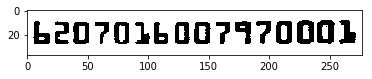

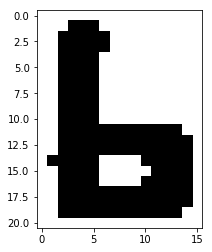

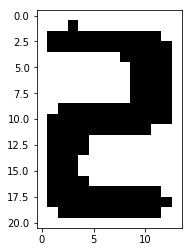

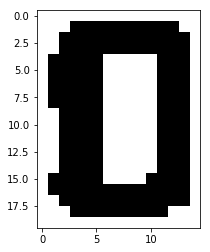

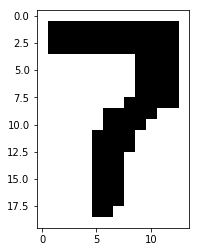

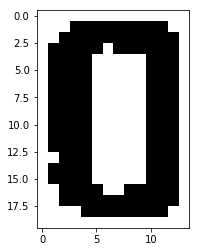

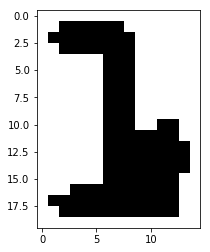

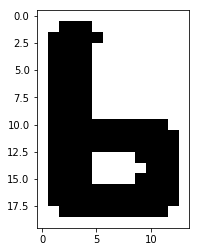

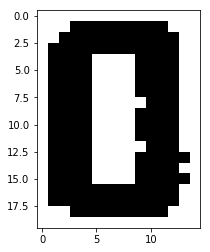

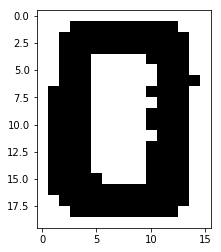

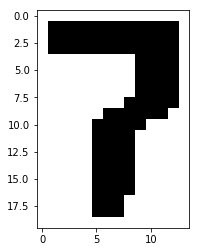

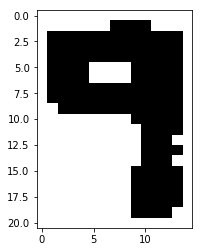

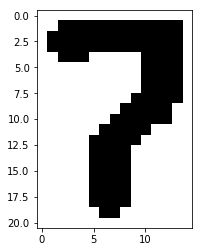

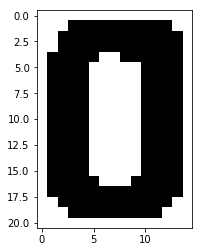

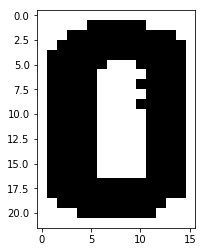

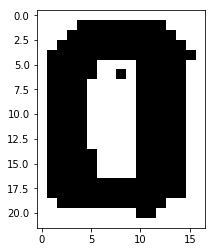

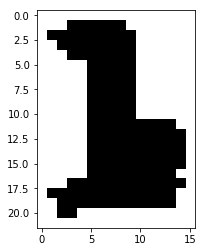

In [10]:
filename = 'data/ktp/cropped/sample7.jpg'
image = cv2.imread(filename)
clean_img = clean_up(image)
plt.imshow(clean_img, cmap='gray');plt.show()
images = get_image_char(clean_img, minh=10, minw=10)
for img in images:
    plt.imshow(img, cmap='gray');plt.show()

In [16]:
filename = 'data/ktp/cropped/sample1.jpg'
im = cv2.imread(filename)
text = pytesseract.image_to_string(Image.fromarray(img), lang="eng")
text

''

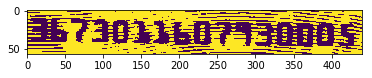

In [86]:
im = cv2.imread(filename,0)
_,thresh = cv2.threshold(im,127,255,cv2.THRESH_BINARY) # threshold
kernel = cv2.getStructuringElement(cv2.MORPH_CROSS,(1,1))
dilated = cv2.dilate(thresh,kernel,iterations = 1) # dilate
plt.imshow(thresh)